# CNN models

Iterating on convolutional neural networks

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2

from functions import *

%load_ext autoreload
%autoreload 2

## Load images for modeling

Use `ImageDataGenerator` class from Keras with `flow_from_directory` method to feed images into the model.

In [2]:
# Image folder for training
train_dir = 'input_images/train'

In [3]:
# Delete metadata files created by Mac OS
!find . -name ".DS_Store" -delete

In [4]:
# Get data from directories and scale
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_gen = datagen.flow_from_directory(train_dir, subset='training', class_mode='binary')
val_gen = datagen.flow_from_directory(train_dir, subset='validation', class_mode='binary', shuffle=False)

Found 1226 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


## CNN1 (first try!)

Trying without image augmentation first, just 15 epochs to start.

In [5]:
# Instatiate model
cnn_model_1 = models.Sequential()

# Add model layers - Using architecture from Canvas 'CNN from Scratch - Lab' to start
cnn_model_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_1.add(MaxPooling2D((2, 2)))
cnn_model_1.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_1.add(MaxPooling2D((2, 2)))
cnn_model_1.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_1.add(MaxPooling2D((2, 2)))
cnn_model_1.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_1.add(MaxPooling2D((2, 2)))
# Flatten
cnn_model_1.add(Flatten())
# Final Dense layers
cnn_model_1.add(Dense(512, activation='relu'))
cnn_model_1.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model_1.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc', 'Recall', 'Precision'])

In [6]:
# Train the model
cnn_history_1 = cnn_model_1.fit(train_gen,
                                epochs=15, 
                                validation_data=val_gen)

Epoch 1/15
39/39 [==============================] - 209s 5s/step - loss: 0.6174 - acc: 0.6852 - recall: 0.7767 - precision: 0.6593 - val_loss: 0.3543 - val_acc: 0.8889 - val_recall: 0.9265 - val_precision: 0.8630
Epoch 2/15
39/39 [==============================] - 186s 5s/step - loss: 0.3626 - acc: 0.8442 - recall: 0.8107 - precision: 0.8713 - val_loss: 0.4390 - val_acc: 0.8444 - val_recall: 0.9853 - val_precision: 0.7701
Epoch 3/15
39/39 [==============================] - 165s 4s/step - loss: 0.3086 - acc: 0.8630 - recall: 0.8301 - precision: 0.8906 - val_loss: 0.2229 - val_acc: 0.9037 - val_recall: 0.9412 - val_precision: 0.8767
Epoch 4/15
39/39 [==============================] - 161s 4s/step - loss: 0.2698 - acc: 0.8834 - recall: 0.8867 - precision: 0.8824 - val_loss: 0.3096 - val_acc: 0.8963 - val_recall: 1.0000 - val_precision: 0.8293
Epoch 5/15
39/39 [==============================] - 161s 4s/step - loss: 0.2244 - acc: 0.9119 - recall: 0.9110 - precision: 0.9140 - val_loss: 0.183

In [7]:
cnn_model_1.save('models/cnn_model_1.h5')

Training eval:
39/39 [==============================] - 134s 3s/step - loss: 0.0038 - acc: 1.0000 - recall: 1.0000 - precision: 1.0000

Validation eval:
5/5 [==============================] - 7s 1s/step - loss: 0.5721 - acc: 0.9407 - recall: 0.9706 - precision: 0.9167


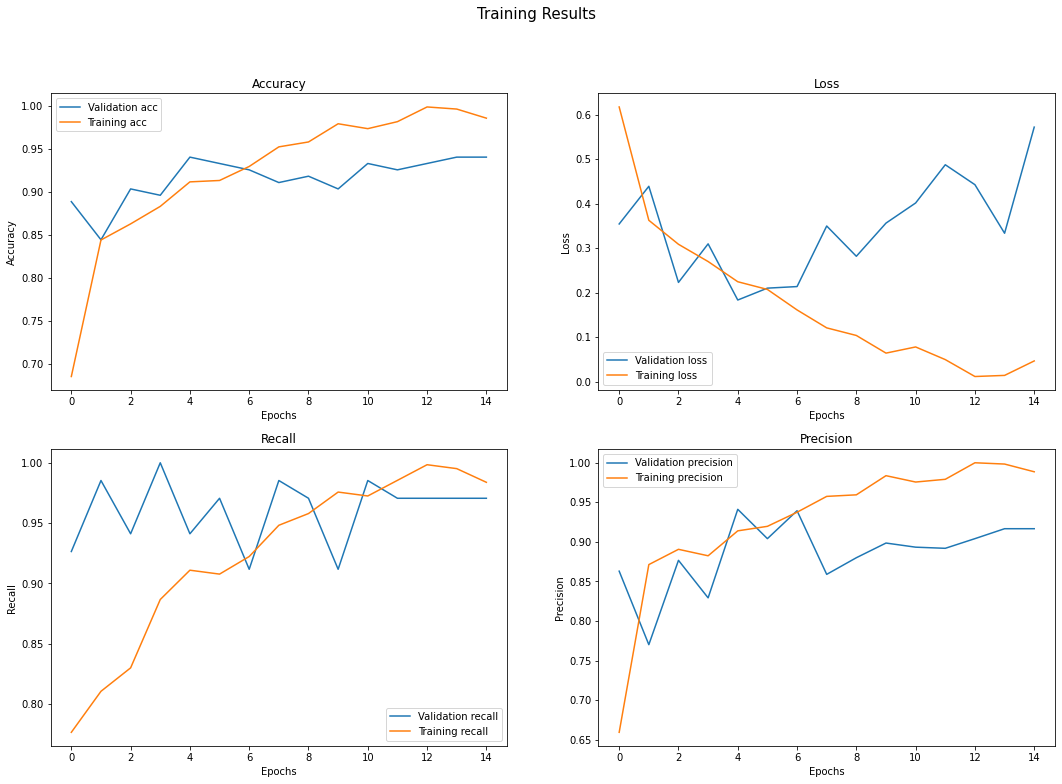

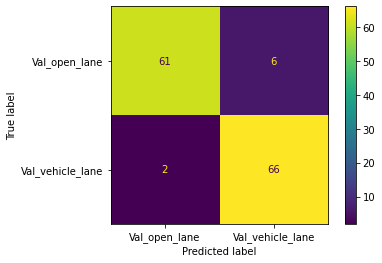

In [8]:
visualize_results(cnn_history_1, cnn_model_1, train_gen, val_gen)

In [9]:
dump(cnn_history_1.history, open('models/cnn_history_1.pkl', 'wb'))

Kind of amazing for a first try--CNNs are really amazing. But this is *way* overfit for sure.